<a href="https://colab.research.google.com/github/kinjastrzebska/DataScience/blob/main/MSI_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sieci neuronowe 2
Kinga Jastrzębska

## Zadanie 1
A. Import bibliotek

In [2]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import numpy as np

import sklearn.metrics 


B. Załaduj dane ze zbioru MNIST oraz wykorzystaj metodę normalize, aby przeprowadzić normalizację danych

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train_normalized = tf.keras.utils.normalize(x_train, axis=-1, order=2)
x_test_normalized = tf.keras.utils.normalize(x_test, axis=-1, order=2)


11493376/11490434 [==============================] - 0s 0us/step


C. Wykorzystując funkcję plot_random_pics zobacz jak wyglądają dane w zbiorze MNIST


In [4]:
def plot_random_pics(data, nmb_of_pics =10):
  fig, axes1 = plt.subplots(nmb_of_pics, nmb_of_pics,figsize=(8,8))
  for j in range(nmb_of_pics):
    for k in range(nmb_of_pics):
      i = np.random.choice(range(len(data)))
      axes1[j][k].set_axis_off()
      axes1[j][k].imshow(data[i], cmap="binary")

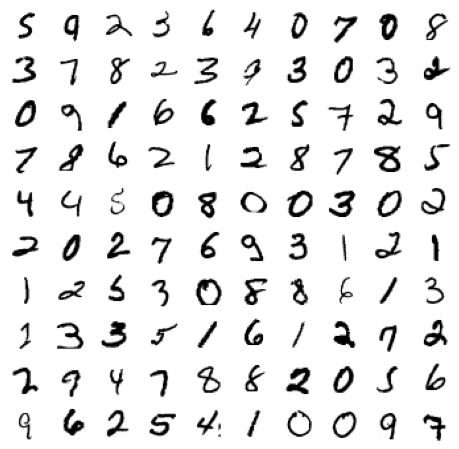

In [5]:
plot_random_pics(x_train)

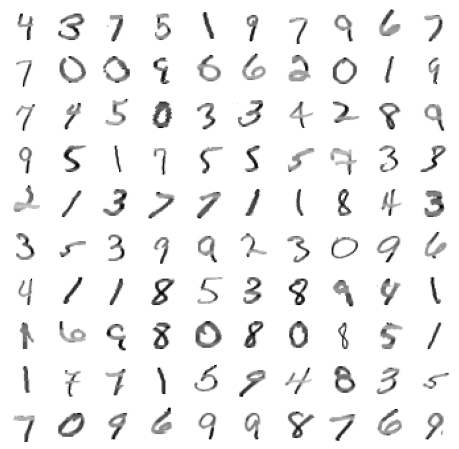

In [6]:
plot_random_pics(x_train_normalized)

D. Zdefiniuj model sieci z jedną warstwą ukrytą z 40-stoma neuronami oraz funkcją aktywacji ReLU. W warstwie wyjściowej wykorzystaj funkcję softmax. Wykorzystaj Sequential API.


In [9]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

E. Skonfiguruj model wykorzystując metodę model.compile() tak, aby wykorzystywał:

* a. funkcję straty będącą wariantem entropii krzyżowej (ang. cross entropy) - SparseCategoricalCrossentropy

* b. Optymalizator wykorzystujący metodę stochastycznego spadku gradientu

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

F. Przeprowadź trening sieci neuronowej w 3 epokach, wykorzystując 20% danych jako zbiór walidacyjny.

In [11]:
model.fit(x_train_normalized, y_train, epochs = 3, validation_split = 0.2, verbose = 2)

Epoch 1/3
1500/1500 - 4s - loss: 1.3024 - accuracy: 0.6827 - val_loss: 0.6744 - val_accuracy: 0.8457
Epoch 2/3
1500/1500 - 2s - loss: 0.5764 - accuracy: 0.8497 - val_loss: 0.4516 - val_accuracy: 0.8832
Epoch 3/3
1500/1500 - 2s - loss: 0.4468 - accuracy: 0.8752 - val_loss: 0.3792 - val_accuracy: 0.8963


G. Przeprowadź ewaluację na zbiorze testowym. Przedstaw macierz pomyłek dla poszczególnych klas.

In [12]:
y_test_pred = model.predict(x_test_normalized)

matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred.argmax(axis=1))
matrix

array([[ 949,    0,    7,    0,    0,    0,   15,    1,    8,    0],
       [   0, 1102,    7,    6,    1,    3,    4,    0,   12,    0],
       [  22,   18,  870,   15,   13,    4,   20,   24,   38,    8],
       [   3,    0,   27,  896,    1,   40,    4,   12,   18,    9],
       [   3,    4,    6,    3,  874,    2,   19,    3,   12,   56],
       [  14,    9,    3,   41,   27,  738,   22,    8,   23,    7],
       [  10,    3,   15,    3,   14,   15,  894,    1,    3,    0],
       [   2,   20,   25,    6,   14,    2,    0,  910,    5,   44],
       [  11,    6,   24,   21,   26,   20,   18,    5,  824,   19],
       [   7,    8,    6,   11,   67,   12,    2,   39,    9,  848]])

In [13]:
print(sklearn.metrics.classification_report(y_test, y_test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.97      0.96      1135
           2       0.88      0.84      0.86      1032
           3       0.89      0.89      0.89      1010
           4       0.84      0.89      0.87       982
           5       0.88      0.83      0.85       892
           6       0.90      0.93      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.87      0.85      0.86       974
           9       0.86      0.84      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



H. Przygotuj kilka własnoręcznie napisanych cyfr w przekształconych do formatu 28 x 28 pikseli. Spróbuj wykorzystać zbudowany model do predykcji. Co zauważyłaś?

In [14]:
import os
os.getcwd()

'/content'

In [15]:
img=cv2.imread('your_image.bmp', cv2.IMREAD_GRAYSCALE)
img = 255 - img
plt.imshow(img, cmap="binary")
img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)
np.expand_dims(img, axis=0)
model.predict(np.expand_dims(img, axis=0)).argmax()

NameError: ignored

## Zadanie 2

Ile wynosi i co oznacza parametr batch_size? - liczba próbek dla jednego update'u gradientu, wynosi defaultowo 32
Co oznacza oraz skąd wzięła się taka wartość liczby “1500” podawana na początku każdej linii logów w procesie uczenia? 
1500 to liczba mini-batchy na jeden zbiór uczący - na jedną epokę przypada 1500 aktualizacji gradientu


## Zadanie 3

In [16]:
nmb_of_tests_per_architecture = 5
nmb_of_neurons_at_disposal = 600 

results_for_nmb_of_hidden_layers = {}

for current_nmb_of_hidden_layers in range(1,10):
    current_val_accuracy = 0
    
    for j in range(nmb_of_tests_per_architecture):
        keras.backend.clear_session()
        del model

        model = keras.models.Sequential()

        model.add(keras.layers.Flatten(input_shape=[28,28]))

        for hidden_layer in range(1, current_nmb_of_hidden_layers):
            model.add(keras.layers.Dense(int(nmb_of_neurons_at_disposal/current_nmb_of_hidden_layers), activation="relu"))
        
        model.add(keras.layers.Dense(10, activation="softmax"))
        
        model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd", 
                 metrics = ["accuracy"])
    
        history = model.fit(x_train_normalized, y_train, epochs=4, validation_data=(x_test_normalized, y_test), verbose=2)
        
        current_val_accuracy += max(history.history['val_accuracy'])

    current_val_accuracy = current_val_accuracy / nmb_of_tests_per_architecture
    
    results_for_nmb_of_hidden_layers[current_nmb_of_hidden_layers] = current_val_accuracy


Epoch 1/4
1875/1875 - 3s - loss: 1.3424 - accuracy: 0.7079 - val_loss: 0.8972 - val_accuracy: 0.8194
Epoch 2/4
1875/1875 - 2s - loss: 0.7823 - accuracy: 0.8290 - val_loss: 0.6703 - val_accuracy: 0.8504
Epoch 3/4
1875/1875 - 2s - loss: 0.6359 - accuracy: 0.8495 - val_loss: 0.5750 - val_accuracy: 0.8615
Epoch 4/4
1875/1875 - 2s - loss: 0.5642 - accuracy: 0.8601 - val_loss: 0.5214 - val_accuracy: 0.8694
Epoch 1/4
1875/1875 - 3s - loss: 1.3492 - accuracy: 0.7043 - val_loss: 0.8946 - val_accuracy: 0.8211
Epoch 2/4
1875/1875 - 2s - loss: 0.7814 - accuracy: 0.8302 - val_loss: 0.6671 - val_accuracy: 0.8500
Epoch 3/4
1875/1875 - 2s - loss: 0.6347 - accuracy: 0.8500 - val_loss: 0.5730 - val_accuracy: 0.8631
Epoch 4/4
1875/1875 - 2s - loss: 0.5633 - accuracy: 0.8606 - val_loss: 0.5201 - val_accuracy: 0.8700
Epoch 1/4
1875/1875 - 3s - loss: 1.3481 - accuracy: 0.7067 - val_loss: 0.8982 - val_accuracy: 0.8173
Epoch 2/4
1875/1875 - 2s - loss: 0.7836 - accuracy: 0.8269 - val_loss: 0.6704 - val_accurac

KeyboardInterrupt: ignored

In [ ]:
lists = sorted(results_for_nmb_of_hidden_layers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) 

plt.plot(x,y)
plt.xlabel("Liczba warstw ukrytych")
plt.ylabel("Accuracy na zbiorze testowym")

## Zadanie 4

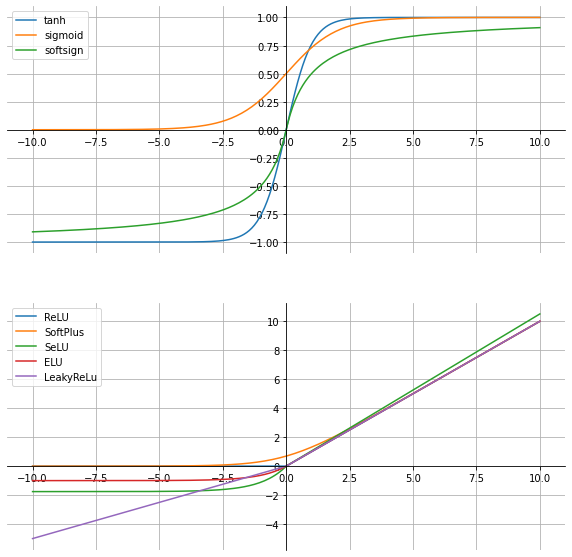

In [17]:
x = np.linspace(-10,10,200)
a = tf.constant(x, dtype = tf.float32)

y_sigmoid = tf.keras.activations.sigmoid(a).numpy()
y_tanh= tf.keras.activations.tanh(a).numpy()
y_softsign= tf.keras.activations.softsign(a).numpy()
y_relu = tf.keras.activations.relu(a).numpy()
y_softplus = tf.keras.activations.softplus(a).numpy()
y_selu = tf.keras.activations.selu(a).numpy()
y_elu = tf.keras.activations.elu(a).numpy()

y_leaky_relu = tf.keras.layers.LeakyReLU(alpha = 0.5)(x).numpy()


fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 1, 1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

plt.plot(x, y_tanh, label='tanh')
plt.plot(x, y_sigmoid, label='sigmoid')
plt.plot(x, y_softsign, label='softsign')
ax.legend(loc="upper left")

ax = fig.add_subplot(2, 1, 2)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_softplus, label='SoftPlus')
plt.plot(x, y_selu, label='SeLU')
plt.plot(x, y_elu, label='ELU')
plt.plot(x, y_leaky_relu, label='LeakyReLu')

ax.legend(loc="upper left")

ax.grid()

fig.savefig('./temp.png', dpi = 300)

plt.show()

## Zadanie 5

In [18]:
keras.backend.clear_session()
del model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train_normalized, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 3s - loss: 1.2062 - accuracy: 0.6978 - val_loss: 0.5915 - val_accuracy: 0.8713
Epoch 2/3
1688/1688 - 3s - loss: 0.5380 - accuracy: 0.8599 - val_loss: 0.3827 - val_accuracy: 0.9078
Epoch 3/3
1688/1688 - 3s - loss: 0.4226 - accuracy: 0.8823 - val_loss: 0.3209 - val_accuracy: 0.9172


In [19]:
keras.backend.clear_session()
del model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train_normalized, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 3s - loss: 2.1251 - accuracy: 0.4591 - val_loss: 1.8871 - val_accuracy: 0.6033
Epoch 2/3
1688/1688 - 3s - loss: 1.6477 - accuracy: 0.6433 - val_loss: 1.3731 - val_accuracy: 0.7297
Epoch 3/3
1688/1688 - 3s - loss: 1.2281 - accuracy: 0.7299 - val_loss: 1.0232 - val_accuracy: 0.8042


## Zadanie 6

In [20]:
keras.backend.clear_session()
del model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train_normalized, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 4s - loss: 0.5066 - accuracy: 0.8534 - val_loss: 0.2789 - val_accuracy: 0.9202
Epoch 2/3
1688/1688 - 3s - loss: 0.3526 - accuracy: 0.8977 - val_loss: 0.2418 - val_accuracy: 0.9318
Epoch 3/3
1688/1688 - 3s - loss: 0.3278 - accuracy: 0.9033 - val_loss: 0.2270 - val_accuracy: 0.9352


## Zadanie 7

In [21]:
keras.backend.clear_session()
#del model

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1], activation = "relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=7, activation = "relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation = "relu"),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

x_train_normalized_conv = x_train_normalized[..., np.newaxis]

history = model.fit(x_train_normalized_conv, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 12s - loss: 0.6323 - accuracy: 0.8122 - val_loss: 0.1779 - val_accuracy: 0.9392
Epoch 2/3
1688/1688 - 7s - loss: 0.1589 - accuracy: 0.9496 - val_loss: 0.1067 - val_accuracy: 0.9675
Epoch 3/3
1688/1688 - 7s - loss: 0.1104 - accuracy: 0.9654 - val_loss: 0.0771 - val_accuracy: 0.9777


In [23]:
keras.backend.clear_session()
#del model

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1], padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=7, padding="SAME"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

x_train_normalized_conv = x_train_normalized[..., np.newaxis]

history = model.fit(x_train_normalized_conv, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 8s - loss: 0.1408 - accuracy: 0.9656 - val_loss: 0.0587 - val_accuracy: 0.9853
Epoch 2/3
1688/1688 - 8s - loss: 0.0555 - accuracy: 0.9862 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 3/3
1688/1688 - 8s - loss: 0.0392 - accuracy: 0.9904 - val_loss: 0.0390 - val_accuracy: 0.9903
